# Plot

## Librairies

In [1]:
import os

import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Preliminary function

In [2]:
def compute_abs_diffs(synapses_l):

    abs_diff_l = []

    for i in range(len(synapses_l)-1):

        abs_diff = np.sum(np.abs(synapses_l[i+1] - synapses_l[i]))
        abs_diff_l.append(abs_diff)

    return abs_diff_l

## Plot for mode `stdp`

In [3]:
filename = "sim_stdp_1001_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [4]:
nb_attractors, synapses_l = results[0], results[1]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])

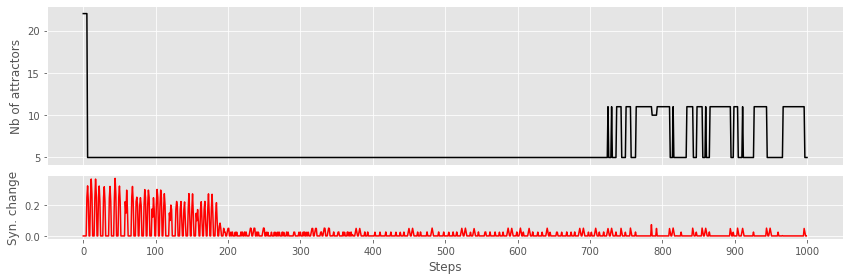

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
# ## Add colored regions for each input chunk
# for start, end in zip(t0s, t1s):
#     ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `gp`

In [6]:
filename = "sim_gp_1001_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [7]:
nb_attractors = results[0][1:] # remove first element (initial A)
nb_attractors = [-x for x in nb_attractors]
input_length = int(filename.split("_")[2])

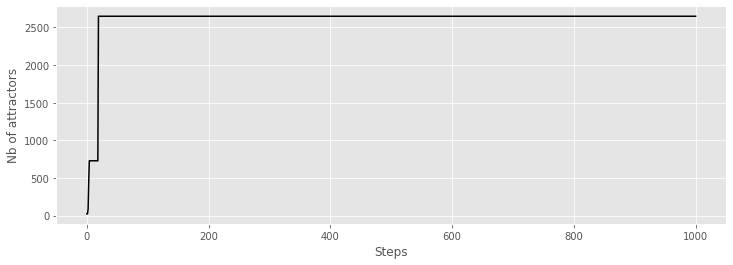

In [8]:
plt.figure(figsize=(12, 4))

# Plot number of attractors
plt.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
plt.xlabel('Steps', size=12)
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `stdp-gp`

In [9]:
filename = "sim_stdp-gp_1001_50_10_seed13.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [10]:
nb_attractors, ticks, synapses_l = results[0], results[1], results[2]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[2])
target_length = int(filename.split("_")[3])

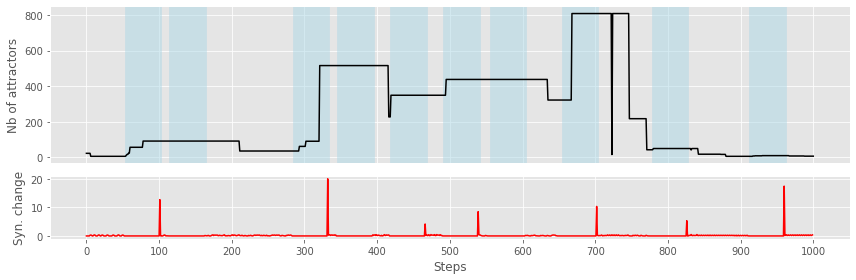

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Chunks start and end points
t0s = ticks
t1s = [start + target_length for start in t0s]

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
plt.savefig("plots/STDP_19.pdf")
plt.show()

## Combined plots

In [12]:
seed = 42
filespecs = (1001, 50, 10)
input_length = filespecs[0]
trigger_length = filespecs[1]
nb_triggers = filespecs[2]

In [17]:
def get_results(seed=42, filespecs=(1001, 50, 10)):

    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]

    results_d = {}

    for mode in ["stdp", "gp", "stdp-gp"]:

        results_d[mode] = {}

        if mode == "gp":

            filename = f"sim_{mode}_{input_length}_seed{seed}.pkl"

            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][1:]  # remove initial value
            nb_attractors = (-np.array(nb_attractors)).tolist()
            results_d[mode]["nb_attractors"] = nb_attractors

        elif mode == "stdp":
            
            filename = f"sim_{mode}_{input_length}_seed{seed}.pkl"
            
            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0]
            results_d[mode]["nb_attractors"] = nb_attractors
            synapses_l = results[1]
            abs_diff_l = compute_abs_diffs(synapses_l)
            results_d[mode]["syn_change"] = abs_diff_l

        elif  mode == "stdp-gp":

            filename = f"sim_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}.pkl"

            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0]
            results_d[mode]["nb_attractors"] = nb_attractors
            ticks = results[1]
            results_d[mode]["ticks"] = ticks
            synapses_l = results[2]
            abs_diff_l = compute_abs_diffs(synapses_l)
            results_d[mode]["syn_change"] = abs_diff_l

    return results_d

In [ ]:
def plot(results_d):
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

    # Chunks start and end points
    t0s = ticks
    t1s = [start + trigger_length for start in t0s]

    # Plot number of attractors
    ax1.plot(range(input_length), results_d["stdp-gp"]["nb_attractors"], linewidth=2, color="black", label='STDP-GP')
    ax1.plot(range(input_length), results_d["stdp"]["nb_attractors"], linewidth=1, linestyle="--", color="grey", label='STDP')
    ax1.plot(range(input_length), results_d["gp"]["nb_attractors"], linewidth=1, linestyle="--", color="black", label='GP')
    ax1.set_ylabel('Nb of attractors', size=12)
    ax1.grid(True)
    ax1.tick_params(bottom = False) 
    ## Add colored regions for each input chunk
    for start, end in zip(t0s, t1s):
        ax1.axvspan(start, end, color='lightblue', alpha=0.75, label="input streams" if start == t0s[0] else "")
    ax1.legend(loc="upper left")

    # Plot synaptic abs changes
    ax2.plot(range(input_length-1), results_d["stdp-gp"]["syn_change"], color='red', alpha=1)
    ax2.set_xlabel('Steps', size=12)
    ax2.set_ylabel('Syn. change', size=12)
    ax2.set_xticks(range(0, input_length, 100))
    ax2.tick_params(axis='y')
    ax2.grid(True)

    fig.tight_layout()
    plt.savefig(f"plots/{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}}.pdf")
    plt.show()

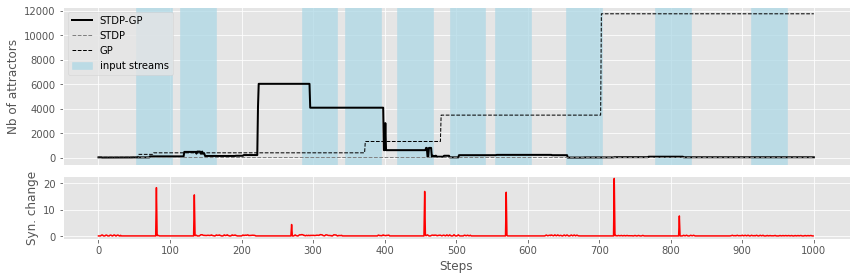

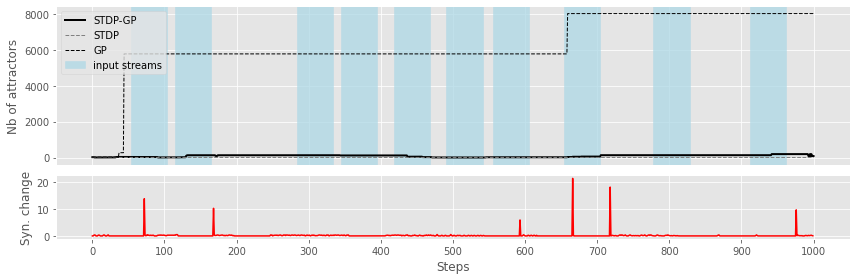

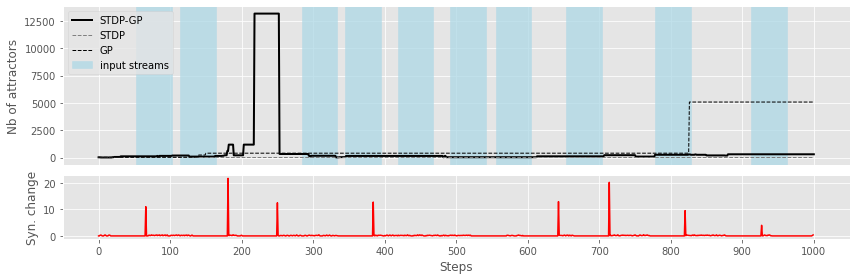

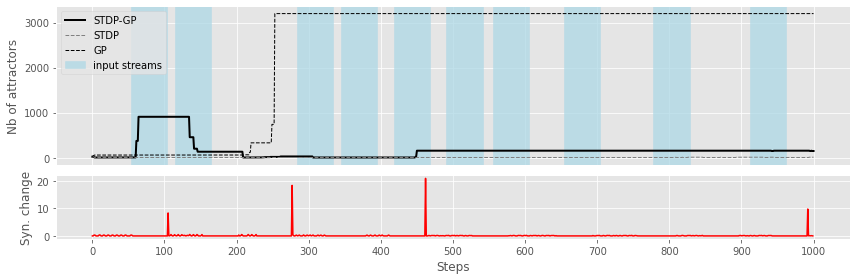

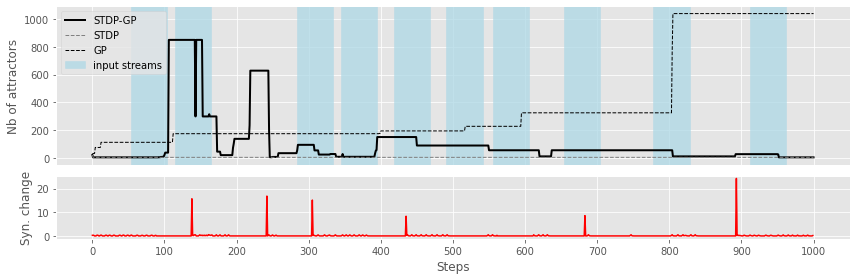

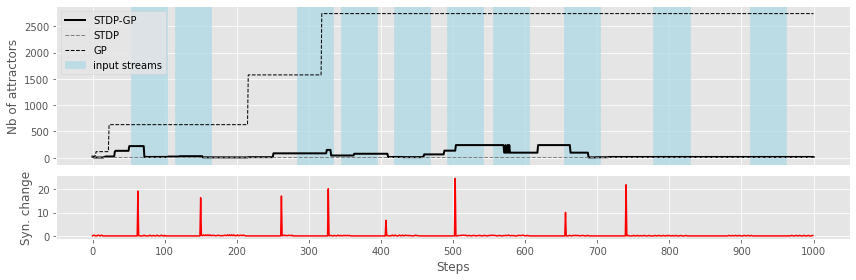

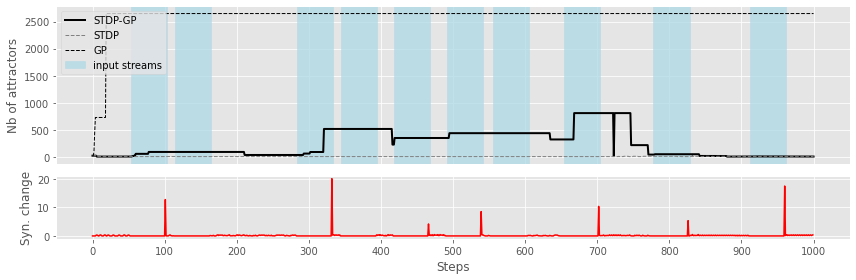

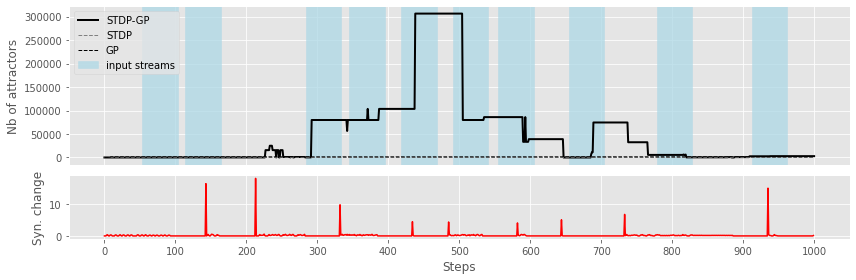

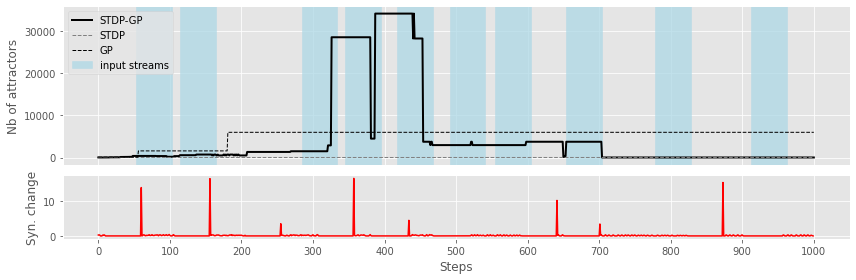

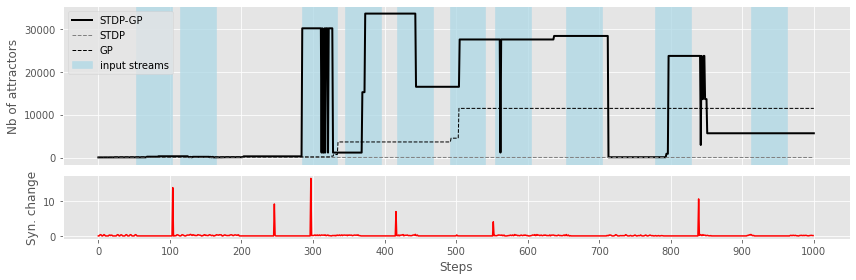

In [60]:
filespecs = (1001, 50, 10)

for seed in [42, 79, 82, 83, 47, 49, 13, 77, 55, 15]:
    
    results_d = get_results(seed, filespecs)
    
    plot(results_d)